In [20]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [21]:
# Analyzes a single influxdb app benchmark experiment

run = 1
number = -1

folder = "../../resultsInflux/regressionApp/run" + str(run) + "/" + str(number) + "/"
print(folder)

../../resultsInflux/regressionApp/run1/-1/


In [22]:
all_files = glob.glob(folder + "*")
print("Files in folder:")
for filename in all_files:
    print(filename)

Files in folder:
../../resultsInflux/regressionApp/run1/-1\benchmark.log
../../resultsInflux/regressionApp/run1/-1\getResults.log
../../resultsInflux/regressionApp/run1/-1\info.txt
../../resultsInflux/regressionApp/run1/-1\initInflux.log
../../resultsInflux/regressionApp/run1/-1\initTsbs.log
../../resultsInflux/regressionApp/run1/-1\latenciesInsertsNew.csv
../../resultsInflux/regressionApp/run1/-1\latenciesInsertsOld.csv
../../resultsInflux/regressionApp/run1/-1\latenciesQueries1New.csv
../../resultsInflux/regressionApp/run1/-1\latenciesQueries1Old.csv
../../resultsInflux/regressionApp/run1/-1\latenciesQueries2New.csv
../../resultsInflux/regressionApp/run1/-1\latenciesQueries2Old.csv
../../resultsInflux/regressionApp/run1/-1\logInsertsNew.log
../../resultsInflux/regressionApp/run1/-1\logInsertsOld.log
../../resultsInflux/regressionApp/run1/-1\logQueries1New.log
../../resultsInflux/regressionApp/run1/-1\logQueries1Old.log
../../resultsInflux/regressionApp/run1/-1\logQueries2New.log
../.

In [23]:
insertsOld = pd.read_csv(folder + "latenciesInsertsOld.csv",
                         header=None,
                         names=["worker","batch","latency (ms)"])

insertsNew = pd.read_csv(folder + "latenciesInsertsNew.csv",
                         header=None,
                         names=["worker","batch","latency (ms)"])

queries1Old = pd.read_csv(folder + "latenciesQueries1Old.csv",
                         header=None,
                         names=["query","latency (ms)"])

queries1New = pd.read_csv(folder + "latenciesQueries1New.csv",
                         header=None,
                         names=["query","latency (ms)"])

queries2Old = pd.read_csv(folder + "latenciesQueries2Old.csv",
                         header=None,
                         names=["query","latency (ms)"])

queries2New = pd.read_csv(folder + "latenciesQueries2New.csv",
                         header=None,
                         names=["query","latency (ms)"])

print("Done.")

Done.


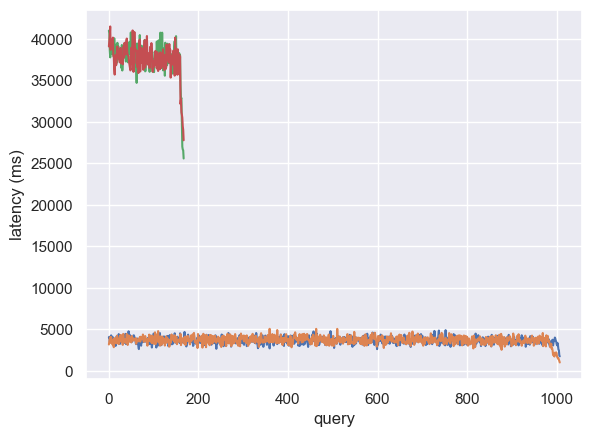

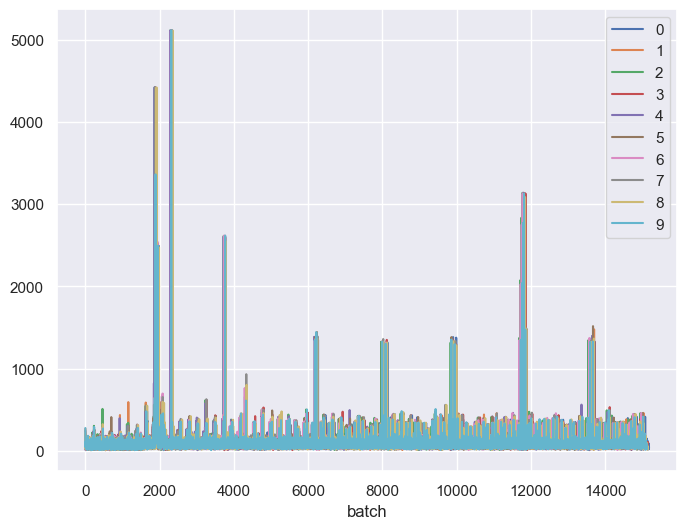

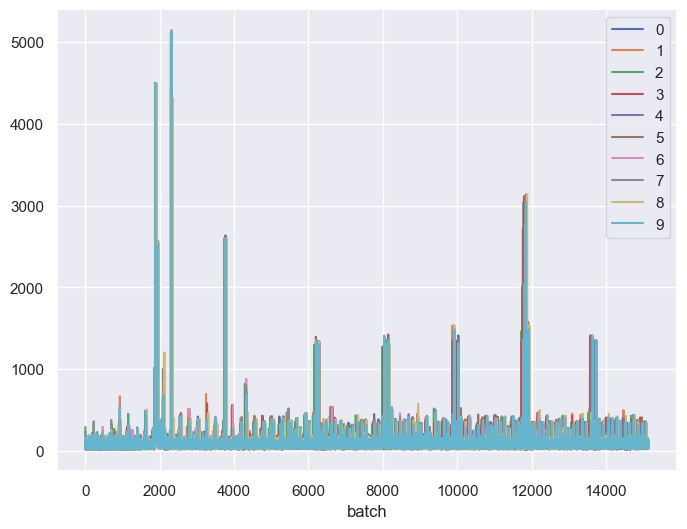

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in insertsOld.groupby('worker'):
    df.plot(x="batch", y = "latency (ms)", ax=ax, label=label)
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
for label, df in insertsNew.groupby('worker'):
    df.plot(x="batch", y = "latency (ms)", ax=ax, label=label)
plt.legend()
plt.show()

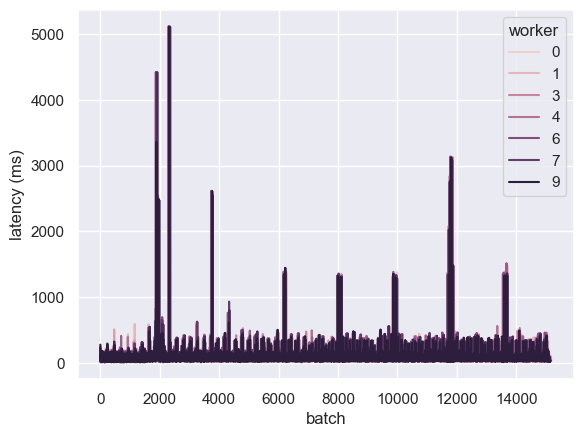

In [25]:
sns.lineplot(data=insertsOld, x="batch", y="latency (ms)", hue="worker")
plt.show()

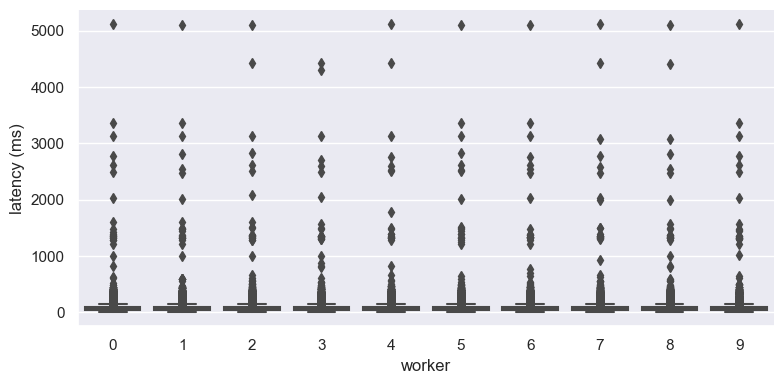

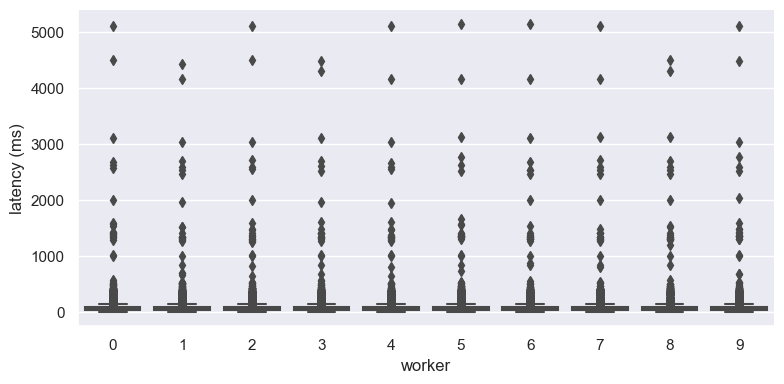

In [26]:
sns.catplot(x="worker", y="latency (ms)", kind="box", data=insertsOld, height=4, aspect=2);
sns.catplot(x="worker", y="latency (ms)", kind="box", data=insertsNew, height=4, aspect=2);
plt.show()

In [27]:
insertsOld.describe()

,worker,batch,latency (ms)
count,151200.000000,151200.000000,151200.000000
mean,4.499332,7560.546534,78.087411
std,2.873944,4364.862996,91.514171
min,0.000000,1.000000,8.169211
25%,2.000000,3780.750000,48.969535
50%,4.000000,7560.500000,63.999234
75%,7.000000,11340.250000,87.878413
max,9.000000,15179.000000,5112.428228


In [28]:
insertsNew.describe()

,worker,batch,latency (ms)
count,151200.000000,151200.000000,151200.000000
mean,4.504114,7560.531481,77.963897
std,2.873188,4364.836960,92.228619
min,0.000000,1.000000,7.931931
25%,2.000000,3780.750000,48.911203
50%,5.000000,7560.500000,64.042327
75%,7.000000,11340.250000,87.577682
max,9.000000,15160.000000,5144.863965


In [29]:
rows = []
for lat in insertsOld["latency (ms)"]:
    rows.append({
        "type" : "old",
        "latency" : lat
    })
for lat in insertsNew["latency (ms)"]:
    rows.append({
        "type" : "new",
        "latency" : lat
    })

df_result = pd.DataFrame(rows)
df_result.describe()

,latency
count,302400.000000
mean,78.025654
std,91.871959
min,7.931931
25%,48.938767
50%,64.019532
75%,87.721748
max,5144.863965


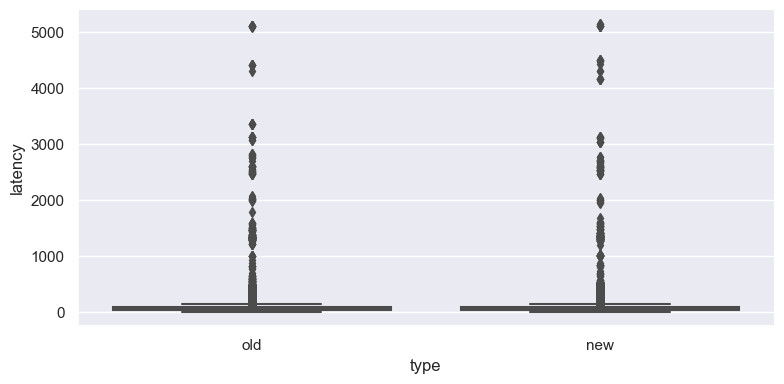

In [30]:
sns.catplot(x="type", y="latency", kind="box", data=df_result, height=4, aspect=2)
plt.show()

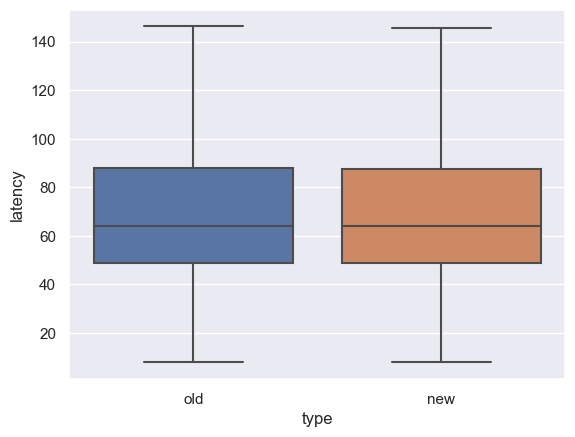

In [31]:
sns.boxplot(x="type", y="latency", showfliers=False, data=df_result);
plt.show()

In [32]:
df_pudding = pd.DataFrame()
df_pudding["old"] = insertsOld["latency (ms)"]
df_pudding["new"] = insertsNew["latency (ms)"]
df_pudding.describe()

,old,new
count,151200.000000,151200.000000
mean,78.087411,77.963897
std,91.514171,92.228619
min,8.169211,7.931931
25%,48.969535,48.911203
50%,63.999234,64.042327
75%,87.878413,87.577682
max,5112.428228,5144.863965


In [33]:
med = df_pudding["old"].median()
print(f"median old {med}")

median old 63.999234


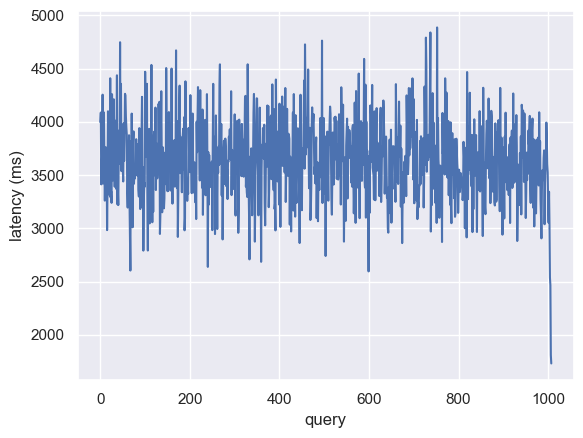

In [34]:
sns.lineplot(x="query", y="latency (ms)", data=queries1Old)
plt.show()

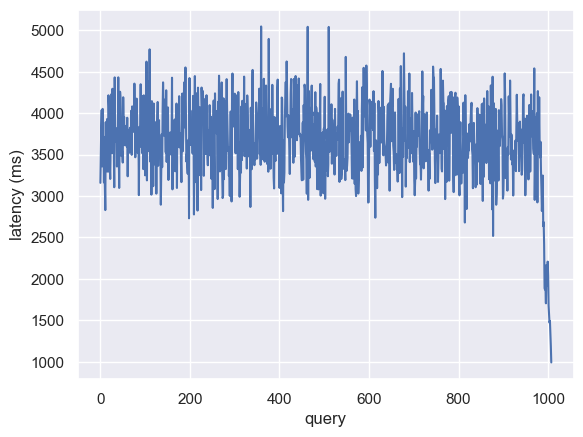

In [35]:
sns.lineplot(x="query", y="latency (ms)", data=queries1New)
plt.show()

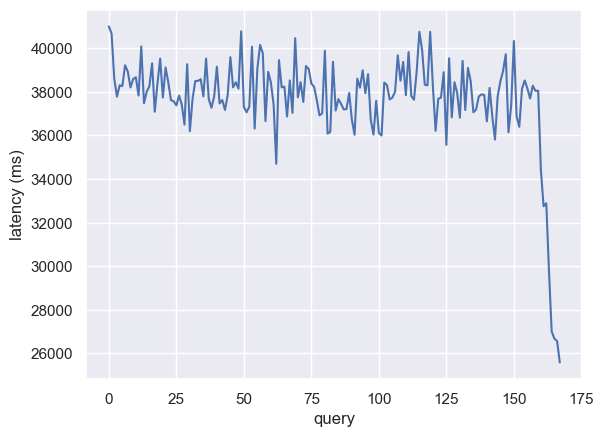

In [36]:
sns.lineplot(x="query", y="latency (ms)", data=queries2Old)
plt.show()

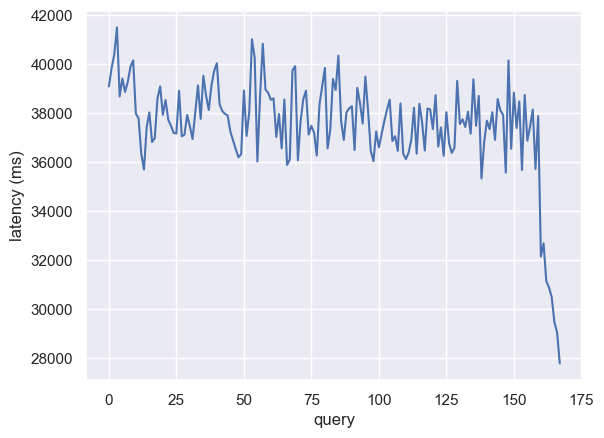

In [37]:
sns.lineplot(x="query", y="latency (ms)", data=queries2New)
plt.show()

In [38]:
df_queries = pd.DataFrame()
df_queries["old1"] = queries1Old["latency (ms)"]
df_queries["new1"] = queries1New["latency (ms)"]
df_queries["old2"] = queries2Old["latency (ms)"]
df_queries["new2"] = queries2New["latency (ms)"]
df_queries.describe()

,old1,new1,old2,new2
count,1008.000000,1008.000000,168.000000,168.000000
mean,3640.359432,3682.071687,37674.473656,37533.343376
std,373.212973,468.916207,2277.935426,2018.484503
min,1731.871892,991.095509,25584.276767,27780.780184
25%,3403.534550,3439.193945,37192.822808,36854.478886
50%,3632.695266,3700.438640,37944.683312,37764.265285
75%,3869.063903,3995.714747,38600.948580,38628.561175
max,4887.537508,5046.349990,41004.252346,41506.402885
